### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 4
### Due: Saturday, Feb 24th at 11.59pm CST
---

## Problem 1

This problem uses a dataset in `/coursework/homeworks/hw_data/`.

1) Read in `hw4_data_1.npy`. This is a (10 x 2) numpy array, with voltage measurements in the first column and heteroscedastic voltage uncertainties in the second column. Compute the sample mean and the standard error on the sample mean for this data.

2) Fit the appropriate ln-likelihood function and find the best-fit mean voltage.

3) Compute and plot the Bayesian posterior probability density (*not the log posterior*) for the mean voltage assuming a uniform prior for the mean in the range 3 to 7. Make sure this posterior pdf is normalized!

4) By either drawing samples from this posterior, or using your gridded posterior pdf to make a cdf, find the equal-tailed 68.3% credible region for the mean, and compare the upper and lower boundaries to the sample mean plus/minus the standard error, respectively. *Also* find the MAP value of the mean.

5) Repeat (3) and (4) this time with a prior on the mean that is uniform in the range 4.6 to 5.4. 

6) Now, imagine that we read an old paper about the experiment that gave us the voltage measurements, and they found that the mean was actually $6\pm0.3$. Repeat (3) and (4) this time with a Gaussian prior on the mean centered at $6$ with standard deviation of $0.3$.

7) Plot all of the normalized posterior pdfs for $\mu$ from (3), (5), and (6) on the same plot, making sure that the xlim of the plot spans 0 to 10.

8) You have made sure that the posterior pdfs are properly normalized, but until now you have ignored the meaning of that normalization constant. It is the Bayesian evidence for the particular model you have applied! Compute the evidence under a new model where the prior for the mean is a delta function at the best-fit value you found in (1) *(think about this and don't just immediately go looking for a `scipy.stats` delta function)*. Compare this to the evidence found under the prior in (3). Taking ratios to make a Bayes factor, which model is favored? Is there much of an Occam penalty by having the wide prior compared to knowing the mean exactly? 

In [10]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

import scipy

### Solution

#### 1.1

In [11]:
#read in numpy file
hw4_data = np.load('/Users/toralcm/repos/astr_8070_s24/coursework/homeworks/hw_data/hw4_data_1.npy');

In [12]:
hw4_data

array([[4.36, 2.24],
       [4.  , 1.94],
       [4.87, 1.39],
       [5.64, 2.55],
       [6.14, 1.69],
       [5.92, 1.38],
       [3.93, 1.  ],
       [6.58, 1.6 ],
       [3.78, 1.  ],
       [5.84, 1.  ]])

In [13]:
voltage_data = hw4_data[:,0]
voltage_uncertainties = hw4_data[:,1]

#equations for sample mean and standard error for a heteroscedastic gaussian

#sample mean
sm_numerator = np.sum((voltage_data)*((voltage_uncertainties)**-2))
sm_denominator = np.sum(1*((voltage_uncertainties)**-2)) 

sample_mean = (sm_numerator)/(sm_denominator)

#standard error
standard_error = (np.sum(1/(voltage_uncertainties)**2))**(-1/2)

print("Sample mean=", sample_mean)
print("Standard error=", standard_error)

Sample mean= 4.942118214425304
Standard error= 0.43024334605205083


#### 1.2

In [14]:
#ln-likelihood function for a heteroscedastic gaussian 
def ln_L_voltage(voltage_data, mu_v, voltage_uncertainties):
    f = -((voltage_data-mu_v)**2)/(2*(voltage_uncertainties**2)) #equation from lecture 5 for log likelihood
    return -np.sum(f) #maximize -log likelihood

#fitting algorithm
mu_v_guess = np.mean(voltage_data) #guess the best fit mean from the data
mu_maximize = scipy.optimize.minimize(ln_L_voltage, mu_v_guess, args=(voltage_data, voltage_uncertainties)) #maximize the ln_L function 
                                         
fit_voltage_mean = mu_maximize.x #best fit mean, should be the same as 1.1

print("best fit mean=", fit_voltage_mean)

best fit mean= [4.94211821]


#### 1.3

3) Compute and plot the Bayesian posterior probability density (*not the log posterior*) for the mean voltage assuming a uniform prior for the mean in the range 3 to 7. Make sure this posterior pdf is normalized!

In [200]:
#compute posterior probability density

#prior range
prior_min = 3
prior_max = 7

#define uniform prior (1/max-min in the range(min, max) and 0 otherwise(similar to lecture 8))
uniform_prior = 1/(prior_max - prior_min)

#define likelihood function -- assume gaussian, becuase the log-likelihood was gaussian (from 1.2)
def f_likelihood(prior_mu): 
    sigma = standard_error
    mu = fit_voltage_mean
    likelihood = scipy.stats.norm.pdf(prior_mu, loc=mu, scale=sigma)
    return likelihood

mu_priors = np.linspace(prior_min, prior_max, 1000) #possible mu values, plug in for prior_mu

#posterior
p_likelihood = f_likelihood(mu_priors)
posterior_1 = p_likelihood * uniform_prior #un-normalized

print(posterior_1)

[8.71971545e-06 9.09343071e-06 9.48234161e-06 9.88702925e-06
 1.03080953e-05 1.07461629e-05 1.12018771e-05 1.16759055e-05
 1.21689393e-05 1.26816938e-05 1.32149094e-05 1.37693520e-05
 1.43458142e-05 1.49451159e-05 1.55681053e-05 1.62156596e-05
 1.68886861e-05 1.75881230e-05 1.83149405e-05 1.90701415e-05
 1.98547629e-05 2.06698765e-05 2.15165901e-05 2.23960483e-05
 2.33094342e-05 2.42579699e-05 2.52429183e-05 2.62655837e-05
 2.73273135e-05 2.84294990e-05 2.95735773e-05 3.07610320e-05
 3.19933950e-05 3.32722478e-05 3.45992227e-05 3.59760044e-05
 3.74043318e-05 3.88859989e-05 4.04228570e-05 4.20168158e-05
 4.36698455e-05 4.53839780e-05 4.71613090e-05 4.90039996e-05
 5.09142783e-05 5.28944422e-05 5.49468599e-05 5.70739725e-05
 5.92782960e-05 6.15624233e-05 6.39290261e-05 6.63808573e-05
 6.89207527e-05 7.15516336e-05 7.42765085e-05 7.70984763e-05
 8.00207275e-05 8.30465475e-05 8.61793186e-05 8.94225222e-05
 9.27797422e-05 9.62546665e-05 9.98510906e-05 1.03572919e-04
 1.07424171e-04 1.114089

In [201]:
#normalization constant 
normalize = posterior_1.sum() #I tried to use scipy.integrate.quad but it wouldn't work for this problem
normalized_posterior_1 = posterior_1/normalize #bayes theorem

print(normalize) #print value of integration constant
print(normalized_posterior_1.sum()) #check that this is properly normalized -- if it is, this should =1
print(normalized_posterior_1)

62.437253069001116
1.0000000000000002
[1.39655655e-07 1.45641108e-07 1.51869936e-07 1.58351445e-07
 1.65095273e-07 1.72111399e-07 1.79410152e-07 1.87002228e-07
 1.94898697e-07 2.03111014e-07 2.11651038e-07 2.20531034e-07
 2.29763699e-07 2.39362162e-07 2.49340009e-07 2.59711290e-07
 2.70490536e-07 2.81692773e-07 2.93333540e-07 3.05428899e-07
 3.17995459e-07 3.31050383e-07 3.44611414e-07 3.58696887e-07
 3.73325747e-07 3.88517571e-07 4.04292583e-07 4.20671673e-07
 4.37676421e-07 4.55329112e-07 4.73652761e-07 4.92671130e-07
 5.12408754e-07 5.32890961e-07 5.54143896e-07 5.76194542e-07
 5.99070746e-07 6.22801244e-07 6.47415685e-07 6.72944656e-07
 6.99419710e-07 7.26873393e-07 7.55339267e-07 7.84851947e-07
 8.15447121e-07 8.47161584e-07 8.80033269e-07 9.14101272e-07
 9.49405892e-07 9.85988656e-07 1.02389236e-06 1.06316108e-06
 1.10384025e-06 1.14597664e-06 1.18961846e-06 1.23481531e-06
 1.28161832e-06 1.33008010e-06 1.38025480e-06 1.43219821e-06
 1.48596771e-06 1.54162238e-06 1.59922299e-06 1

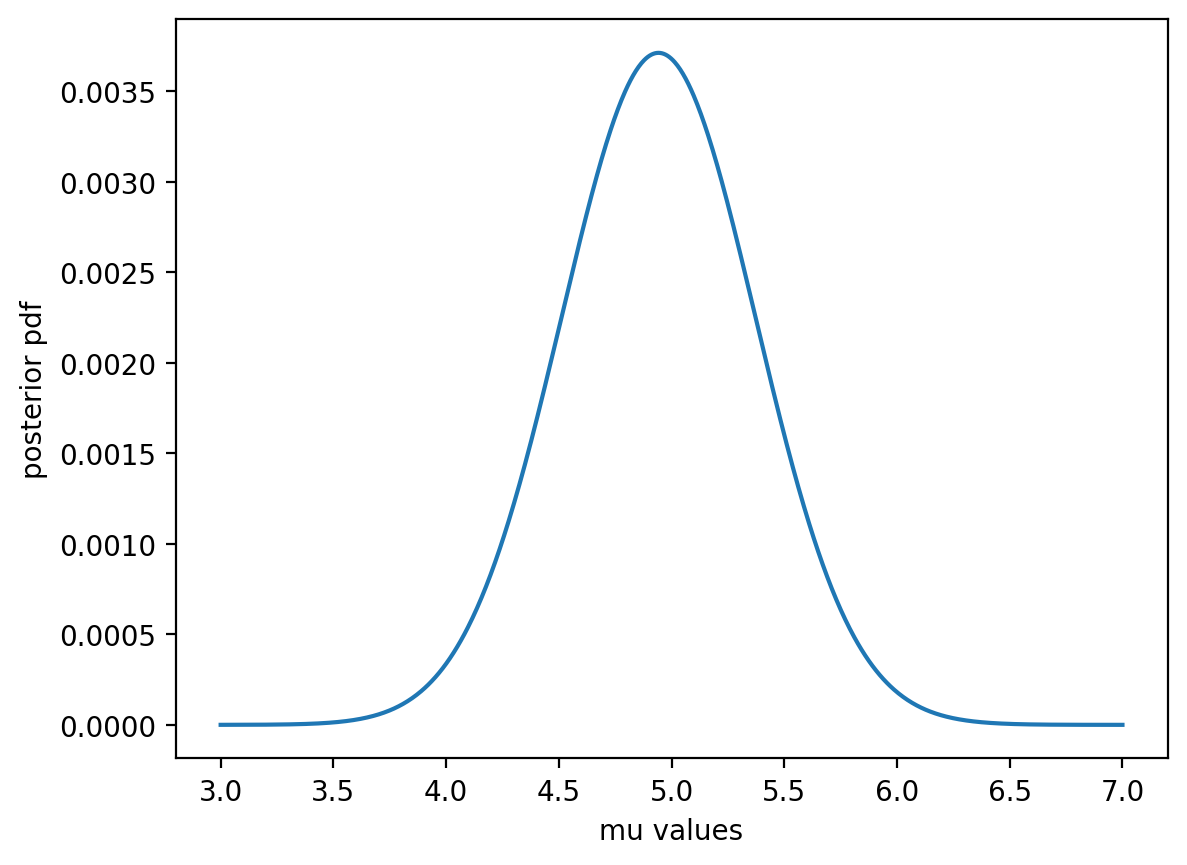

In [151]:
#plot 

plt.plot(mu_priors, normalized_posterior_1)
plt.xlabel('mu values')
plt.ylabel('posterior pdf')
plt.show()


####  1.4

By either drawing samples from this posterior, or using your gridded posterior pdf to make a cdf, find the equal-tailed 68.3% credible region for the mean, and compare the upper and lower boundaries to the sample mean plus/minus the standard error, respectively. *Also* find the MAP value of the mean.

In [115]:
#make a cdf
#cdf = sum (or integral) of the pdf
posterior_cdf = np.cumsum(normalized_posterior_1) #cumulative sum

#credible region
#the 68.3% credible region can be found by identifying when the cdf = upper and lower bounds of the region

#index that correlates to these cdf values
upper_index = np.where(posterior_cdf>=0.683)[0][0]
lower_index= np.where(posterior_cdf>=0.317)[0][0]

#find the corresponding mu value
upper_boundary = mu_priors[upper_index]
lower_bounadry = mu_priors[lower_index]


print("credible region upper boundary=", upper_boundary)
print("credible region lower boundary=", lower_bounadry)


#sample mean plus/minus the standard error=
plus_error = sample_mean+standard_error
minus_error = sample_mean-standard_error

print("sample mean plus standard error=", plus_error)
print("sample mean minus standard error=", minus_error)

credible region upper boundary= 5.146146146146146
credible region lower boundary= 4.737737737737738
sample mean plus standard error= 5.372361560477355
sample mean minus standard error= 4.511874868373253


In [121]:
map_location = np.where(normalized_posterior_1==normalized_posterior_1.max())[0][0]
map_value = mu_priors[map_location]
print("MAP=", map_value)

MAP= 4.941941941941942


^This is basically the same as the sample mean from 1.1

#### 1.5

In [170]:
#repeat 1.3

#compute posterior probability density

#prior range
prior_min2 = 4.6
prior_max2 = 5.4

#define uniform prior (1/max-min in the range(min, max) and 0 otherwise(similar to lecture 8))
uniform_prior2 = 1/(prior_max2 - prior_min2)

#define likelihood function
def f_likelihood(prior_mu2): 
    sigma = standard_error
    mu = fit_voltage_mean
    likelihood2 = scipy.stats.norm.pdf(prior_mu2, loc=mu, scale=sigma)
    return likelihood2

mu_priors2 = np.linspace(prior_min2, prior_max2, 1000) #possible mu values, plug in for prior_mu

#posterior
p_likelihood2 = f_likelihood(mu_priors2)
posterior_2 = p_likelihood2 * uniform_prior #un-normalized

#normalization constant 
normalize = posterior_2.sum() #I tried to use scipy.integrate.quad but it wouldn't work for this problem
normalized_posterior_2 = posterior_2/normalize #bayes theorem

print(normalize) #print value of integration constant
print(normalized_posterior_2.sum()) #check that this is properly normalized -- if it is, this should =1
print(normalized_posterior_2)


200.92850145675172
0.9999999999999999
[0.00084099 0.00084224 0.00084348 0.00084472 0.00084596 0.0008472
 0.00084844 0.00084968 0.00085091 0.00085215 0.00085338 0.00085462
 0.00085585 0.00085708 0.00085831 0.00085954 0.00086076 0.00086199
 0.00086321 0.00086444 0.00086566 0.00086688 0.0008681  0.00086932
 0.00087053 0.00087175 0.00087296 0.00087417 0.00087539 0.0008766
 0.0008778  0.00087901 0.00088022 0.00088142 0.00088263 0.00088383
 0.00088503 0.00088623 0.00088742 0.00088862 0.00088981 0.00089101
 0.0008922  0.00089339 0.00089458 0.00089576 0.00089695 0.00089813
 0.00089931 0.0009005  0.00090167 0.00090285 0.00090403 0.0009052
 0.00090638 0.00090755 0.00090872 0.00090988 0.00091105 0.00091221
 0.00091338 0.00091454 0.0009157  0.00091686 0.00091801 0.00091917
 0.00092032 0.00092147 0.00092262 0.00092377 0.00092491 0.00092605
 0.0009272  0.00092834 0.00092947 0.00093061 0.00093175 0.00093288
 0.00093401 0.00093514 0.00093627 0.00093739 0.00093851 0.00093964
 0.00094076 0.00094187 0.00

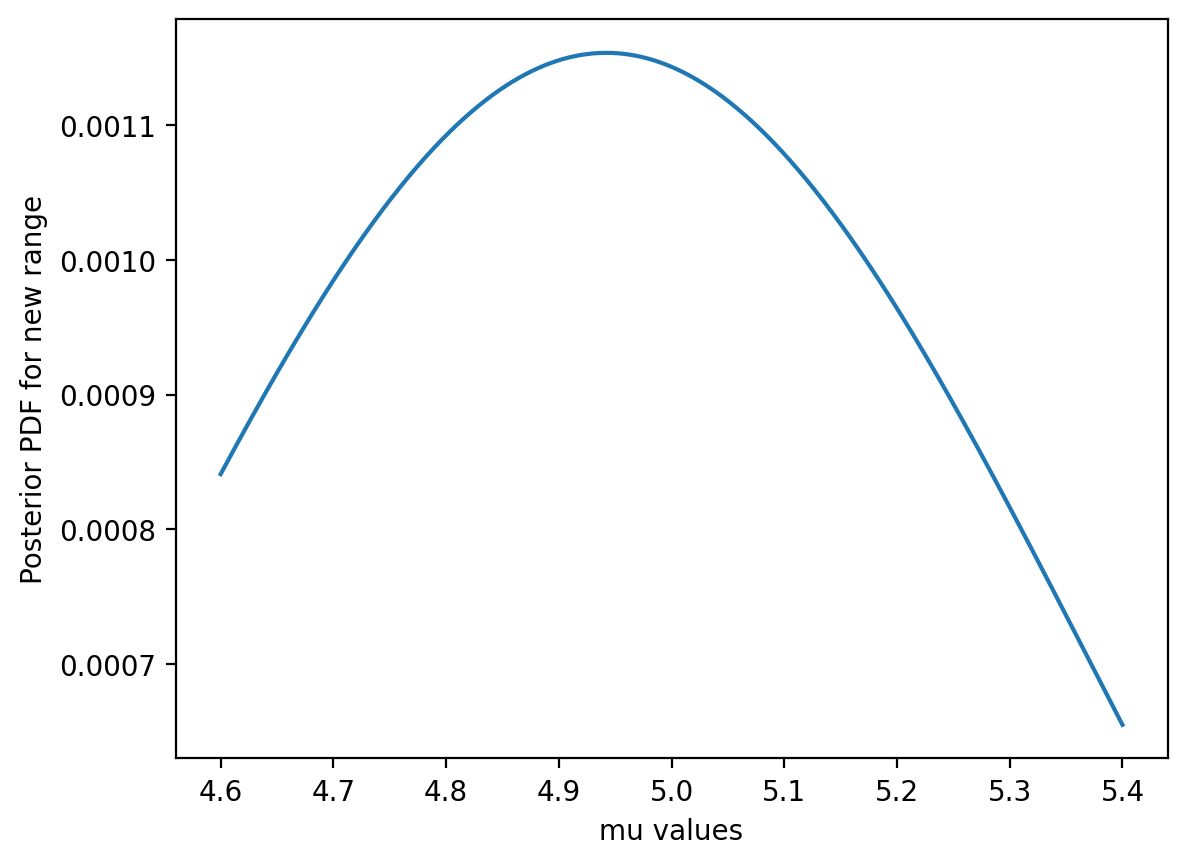

In [171]:
#plot 

plt.plot(mu_priors2, normalized_posterior_2)
plt.xlabel('mu values')
plt.ylabel('Posterior PDF for new range')
plt.show()


In [172]:
#repeat 4 
#make a cdf
#cdf = sum (or integral) of the pdf
posterior_cdf2 = np.cumsum(normalized_posterior_2) #cumulative sum

#credible region
#the 68.3% credible region can be found by identifying when the cdf = upper and lower bounds of the region

#index that correlates to these cdf values
upper_index2 = np.where(posterior_cdf2>=0.683)[0][0]
lower_index2= np.where(posterior_cdf2>=0.317)[0][0]

#find the corresponding mu value
upper_boundary2 = mu_priors2[upper_index2]
lower_bounadry2 = mu_priors2[lower_index2]


print("credible region upper boundary=", upper_boundary2)
print("credible region lower boundary=", lower_bounadry2)


#sample mean plus/minus the standard error=
plus_error = sample_mean+standard_error
minus_error = sample_mean-standard_error

print("sample mean plus standard error=", plus_error)
print("sample mean minus standard error=", minus_error)

#MAP 
map_location2 = np.where(normalized_posterior_2==normalized_posterior_2.max())[0][0]
map_value2 = mu_priors2[map_location2]
print("MAP=", map_value2)


credible region upper boundary= 5.110910910910911
credible region lower boundary= 4.852252252252252
sample mean plus standard error= 5.372361560477355
sample mean minus standard error= 4.511874868373253
MAP= 4.941941941941942


#### 1.6

Now, imagine that we read an old paper about the experiment that gave us the voltage measurements, and they found that the mean was actually $6\pm0.3$. Repeat (3) and (4) this time with a Gaussian prior on the mean centered at $6$ with standard deviation of $0.3$.


In [173]:
#repeat 3

#prior range
prior_min = 3
prior_max = 7

#define gaussian prior
def priors3(mu_priors3):
    prior_mu = 6
    prior_sigma = 0.3
    uniform_prior3 = scipy.stats.norm.pdf(mu_priors3, loc=prior_mu, scale=prior_sigma)
    return uniform_prior3

#define likelihood function 
def f_likelihood(prior_mu3): 
    sigma3 = standard_error
    mu3 = sample_mean
    likelihood3 = scipy.stats.norm.pdf(prior_mu3, loc=mu3, scale=sigma3)
    return likelihood3

mu_priors3 = np.linspace(prior_min, prior_max, 1000) #possible mu values, plug in for prior_mu

#posterior
p_likelihood3 = f_likelihood(mu_priors3)
p_prior3 = priors3(mu_priors3)
posterior_3 = p_likelihood3 * p_prior3 #un-normalized

#normalization constant 
normalize = posterior_3.sum() #I tried to use scipy.integrate.quad but it wouldn't work for this problem
normalized_posterior_3 = posterior_3/normalize #bayes theorem

print(normalize) #print value of integration constant
print(normalized_posterior_3.sum()) #check that this is properly normalized -- if it is, this should =1
print(normalized_posterior_3)


24.85033855373645
1.0
[3.59993538e-28 4.28988220e-28 5.11070782e-28 6.08697844e-28
 7.24782164e-28 8.62776396e-28 1.02677205e-27 1.22161637e-27
 1.45305038e-27 1.72787183e-27 2.05412752e-27 2.44134020e-27
 2.90077622e-27 3.44576119e-27 4.09205204e-27 4.85827556e-27
 5.76644513e-27 6.84256935e-27 8.11736876e-27 9.62711960e-27
 1.14146469e-26 1.35304930e-26 1.60342919e-26 1.89963854e-26
 2.24997236e-26 2.66420977e-26 3.15387644e-26 3.73255278e-26
 4.41623590e-26 5.22376454e-26 6.17731783e-26 7.30300040e-26
 8.63152884e-26 1.01990366e-25 1.20480178e-25 1.42284330e-25
 1.67990054e-25 1.98287387e-25 2.33986949e-25 2.76040753e-25
 3.25566563e-25 3.83876398e-25 4.52509864e-25 5.33273146e-25
 6.28284581e-25 7.40027933e-25 8.71414632e-25 1.02585648e-24
 1.20735057e-24 1.42057837e-24 1.67102146e-24 1.96509650e-24
 2.31031267e-24 2.71545532e-24 3.19080003e-24 3.74836209e-24
 4.40218723e-24 5.16869026e-24 6.06704936e-24 7.11966523e-24
 8.35269536e-24 9.79667577e-24 1.14872441e-23 1.34659808e-23
 1

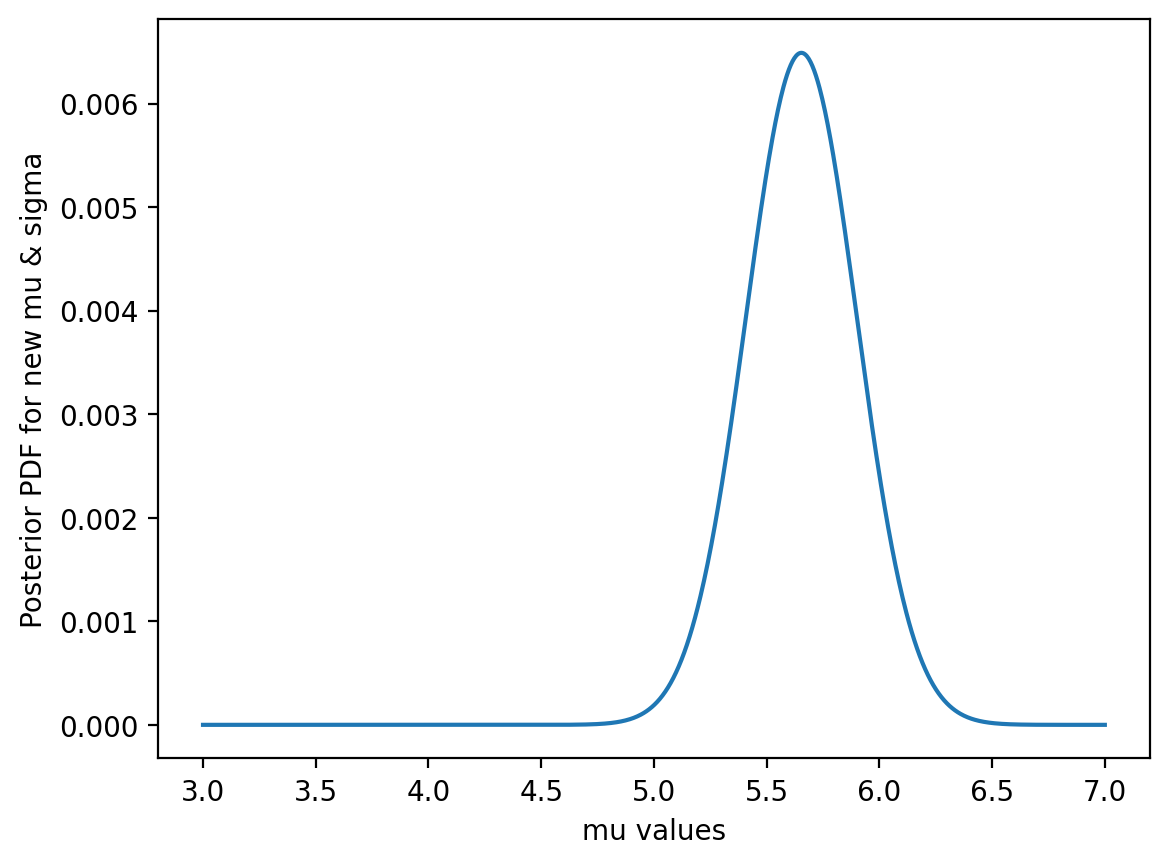

In [174]:
#plot 

plt.plot(mu_priors3, normalized_posterior_3)
plt.xlabel('mu values')
plt.ylabel('Posterior PDF for new mu & sigma')
plt.show()


In [175]:
#repeat 4
#make a cdf
#cdf = sum (or integral) of the pdf
posterior_cdf3 = np.cumsum(normalized_posterior_3) #cumulative sum

#credible region
#the 68.3% credible region can be found by identifying when the cdf = upper and lower bounds of the region

#index that correlates to these cdf values
upper_index3 = np.where(posterior_cdf3>=0.683)[0][0]
lower_index3= np.where(posterior_cdf3>=0.317)[0][0]

#find the corresponding mu value
upper_boundary3 = mu_priors3[upper_index3]
lower_bounadry3 = mu_priors3[lower_index3]


print("credible region upper boundary=", upper_boundary3)
print("credible region lower boundary=", lower_bounadry3)


#sample mean plus/minus the standard error=
plus_error = sample_mean+standard_error
minus_error = sample_mean-standard_error

print("sample mean plus standard error=", plus_error)
print("sample mean minus standard error=", minus_error)

#MAP 
map_location3 = np.where(normalized_posterior_3==normalized_posterior_3.max())[0][0]
map_value3 = mu_priors3[map_location3]
print("MAP=", map_value3)

credible region upper boundary= 5.7707707707707705
credible region lower boundary= 5.538538538538539
sample mean plus standard error= 5.372361560477355
sample mean minus standard error= 4.511874868373253
MAP= 5.654654654654655


#### 1.7

Plot all of the normalized posterior pdfs for $\mu$ from (3), (5), and (6) on the same plot, making sure that the xlim of the plot spans 0 to 10.

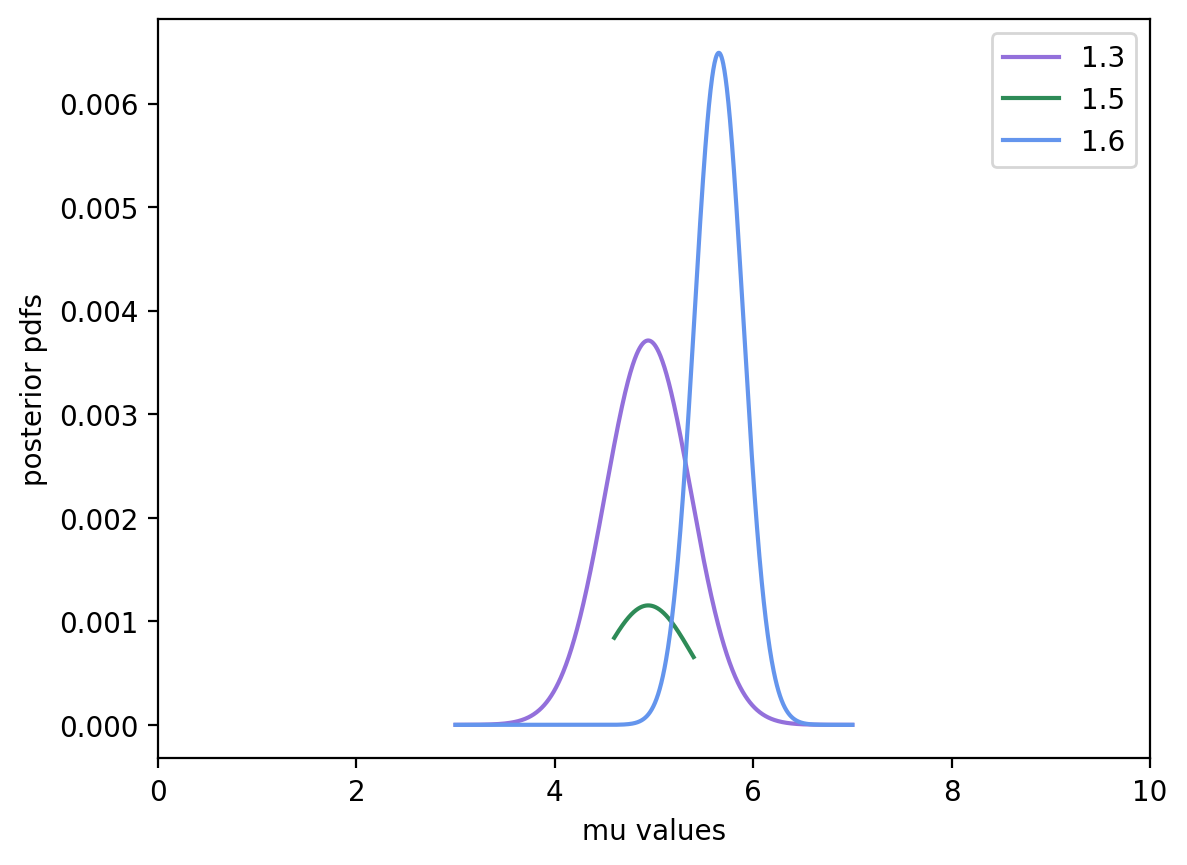

In [176]:
#plot all posterior pdfs

#1.3
plt.plot(mu_priors, normalized_posterior_1, color='mediumpurple', label='1.3')

#1.5 
plt.plot(mu_priors2, normalized_posterior_2, color='seagreen', label='1.5')

#1.6
plt.plot(mu_priors3, normalized_posterior_3, color='cornflowerblue', label='1.6')


plt.xlabel('mu values')
plt.ylabel('posterior pdfs')

plt.xlim(0, 10)
plt.legend()
plt.show()

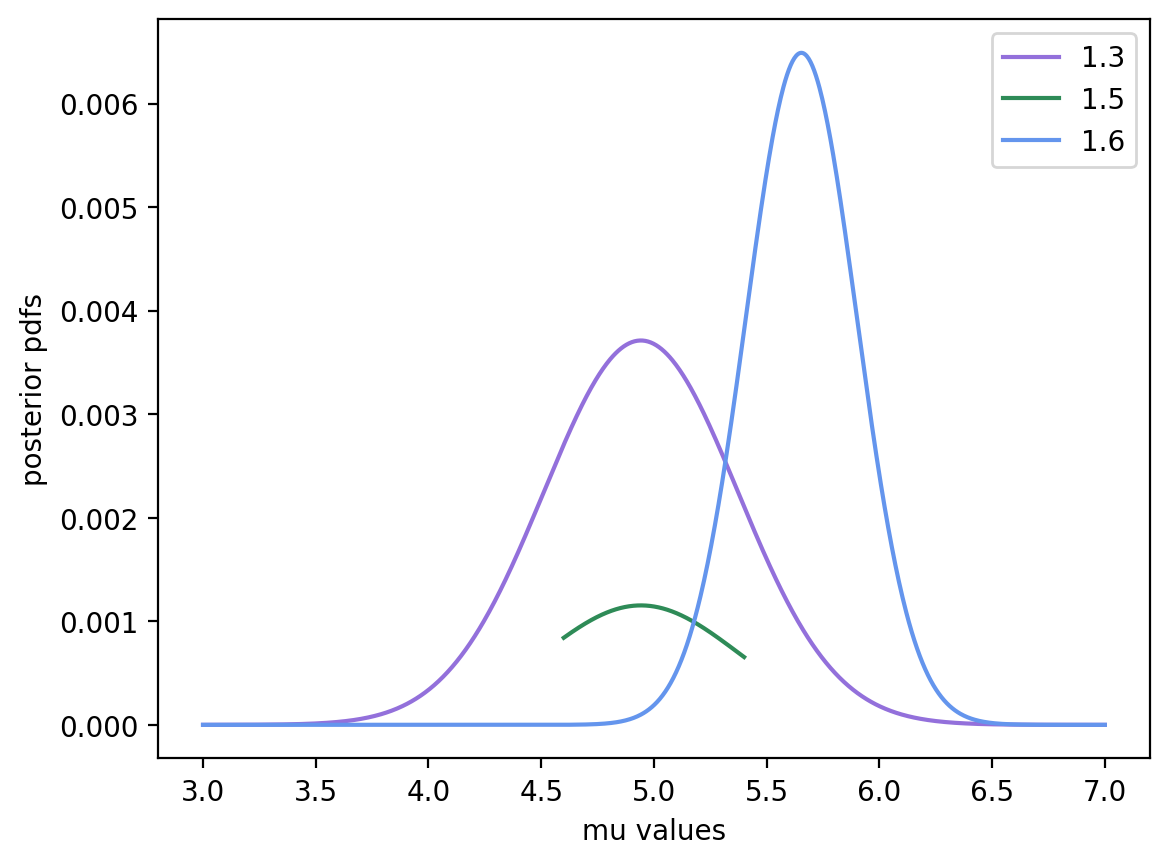

In [182]:
#plot all posterior pdfs

#1.3
plt.plot(mu_priors, normalized_posterior_1, color='mediumpurple', label='1.3')

#1.5 
plt.plot(mu_priors2, normalized_posterior_2, color='seagreen', label='1.5')

#1.6
plt.plot(mu_priors3, normalized_posterior_3, color='cornflowerblue', label='1.6')


plt.xlabel('mu values')
plt.ylabel('posterior pdfs')

#plt.xlim(4, 6) --just to see the plot without setting xlim
plt.legend()
plt.show()

For the 1.5 plot, the prior isn't as wide, so the posterior pdf looks kind of strange plotted against 1.3 and 1.6 (wide priors)

#### 1.8

You have made sure that the posterior pdfs are properly normalized, but until now you have ignored the meaning of that normalization constant. It is the Bayesian evidence for the particular model you have applied! Compute the evidence under a new model where the prior for the mean is a delta function at the best-fit value you found in (1) *(think about this and don't just immediately go looking for a `scipy.stats` delta function)*. Compare this to the evidence found under the prior in (3). Taking ratios to make a Bayes factor, which model is favored? Is there much of an Occam penalty by having the wide prior compared to knowing the mean exactly?

In [141]:
#change mu_priors to a delta function at sample_mean

#for a delta function, delta(x-mu), the value is 0 everywhere except for when x=mu
#so, for a posterior pdf, applying a delta function for mu_priors means that there is a strong belief that mu actually = prior estimated value for mu, and you can just plug in mu_priors = sample_mean

#new model 
#compute posterior probability density

#prior range
prior_min = 3
prior_max = 7

#define uniform prior (1/max-min in the range(min, max) and 0 otherwise(similar to lecture 8))
uniform_prior = 1/(prior_max - prior_min)

#define likelihood function
def f_likelihood(prior_mu): 
    sigma = standard_error
    mu = fit_voltage_mean
    likelihood_delta = scipy.stats.norm.pdf(prior_mu, loc=mu, scale=sigma)
    return likelihood_delta

mu_priors_delta = sample_mean

#posterior
p_likelihood_delta = f_likelihood(mu_priors)
posterior_delta = p_likelihood * uniform_prior #un-normalized

print(posterior_1)


#normalize
normalize_delta = posterior_delta.sum() #I tried to use scipy.integrate.quad but it wouldn't work for this problem
normalized_posterior_1 = posterior_delta/normalize_delta #bayes theorem

print("evidence=", normalize_delta) #print value of integration constant
print(normalized_posterior_1.sum()) #check that this is properly normalized -- if it is, this should =1
print(normalized_posterior_1)

[0.231812]
evidence= 0.23181199898973492
1.0
[1.]


In [183]:
#compare evidence in 1.3 and 1.8
#bayes factor = z1/z2

bayes_factor_13 = posterior_1.sum()/normalize_delta #printed value for normalization constant in 1.3/normalization constant in 1.8
bayes_factor_18 = normalize_delta/posterior_1.sum() #normalization constant in 1.8/printed value for normalization constant in 1.3
#i explicitly wrote the sum for the normalization constant here because i used 'normalize=' several times after 1.3 


print("Bayes factor for 1.3 model=", bayes_factor_13)
print("Bayes factor for 1.8 model =", bayes_factor_18)

Bayes factor for 1.3 model= 269.3443537914789
Bayes factor for 1.8 model = 0.003712719371775583


Based on the bayes factors, the model in 1.3 is favored. At first, I thought that simplifying the model by specifying the mean would limit Occam's pentaly, but there doesn't seem to be any penalty for the wide prior in 1.3.

## Problem 2

This problem uses a dataset in `/coursework/homeworks/hw_data/`.

1) Read in `hw4_data_2.npy`, which is a (3 x 20) numpy array that you used in `Lecture_9`. Set `x, y, sigma_y = data`. 

We're going to do some polynomial fits to this data just like in `Lecture 9`. However, in all cases you should **keep the $y$-intercept fixed at $-0.23$**. 

2) Use the following code to compute the un-normalized posterior pdf (i.e. just the likelihood x prior) on a grid of the linear coefficient (i.e. the slope) of a linear model, with a uniform prior between 0.5 and 1.5. Plot this posterior pdf. Remember this is just a one-dimensional model because the $y$-intercept is fixed. I advise a grid size of 100.

In [132]:
#Functions to do a polynomial fit, and compute the likelihood
def polynomial_fit(theta, x):
    """Polynomial model of degree (len(theta) - 1)"""
    # For a polynomial with order 1, this gives theta_0 + theta_1*x
    # For a polynomial with order 2, this gives theta_0 + theta_1*x + theta_2*x^2, etc.
    return sum(t * x ** n for (n, t) in enumerate(theta))

# compute the data log-likelihood given a model
def logL(theta, data, model=polynomial_fit):
    """Gaussian log-likelihood of the model at theta"""
    x, y, sigma_y = data
    y_fit = model(theta, x)
    return sum(scipy.stats.norm.logpdf(*args) 
               for args in zip(y, y_fit, sigma_y))

3) Using your 1D gridded likelihood-x-prior, compute the Bayesian evidence of this linear model. This may be a big number!

4) Now compute the joint 2D posterior pdf (again just the likelihood x prior) of linear and quadratic coefficients of a quadratic model. Give the linear coefficient a uniform prior between 0.5 and 1.5. Give the quadratic coefficient a uniform prior between -1 and 0.25. Plot this two-dimensional posterior. Remember this is a two-dimensional model because the $y$-intercept is fixed. I advise a grid size of 100 in each model dimension.

5) Using your 2D gridded likelihood-x-prior, compute the Bayesian evidence of the quadratic model. 

6) Calculate the Bayes factor for a linear versus quadratic model. How does this compare/contrast with the BIC model comparison in the lecture? 

### Solution

#### 2.1

In [203]:
data = np.load('/Users/toralcm/repos/astr_8070_s24/coursework/homeworks/hw_data/hw4_data_2.npy');

In [204]:
data

array([[ 0.42,  0.72,  0.  ,  0.3 ,  0.15,  0.09,  0.19,  0.35,  0.4 ,
         0.54,  0.42,  0.69,  0.2 ,  0.88,  0.03,  0.67,  0.42,  0.56,
         0.14,  0.2 ],
       [ 0.33,  0.41, -0.25,  0.01, -0.05, -0.05, -0.12,  0.26,  0.29,
         0.39,  0.31,  0.42, -0.01,  0.58, -0.2 ,  0.52,  0.15,  0.32,
        -0.13, -0.09],
       [ 0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
         0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
         0.1 ,  0.1 ]])

#### 2.2

Use the following code to compute the un-normalized posterior pdf (i.e. just the likelihood x prior) on a grid of the linear coefficient (i.e. the slope) of a linear model, with a uniform prior between 0.5 and 1.5. Plot this posterior pdf. Remember this is just a one-dimensional model because the $y$-intercept is fixed. I advise a grid size of 100.

In [322]:
# From https://jakevdp.github.io/blog/2015/08/07/frequentism-and-bayesianism-5-model-selection/ :
#"If the theta variable is of length 2, this corresponds to the linear model"

#theta variable of length 2 has a format: y=mx+b, where we set b at -0.23, and vary the slope, m, by theta values
#theta_0 = -0.23 and theta_1 = grid of slopes


def polynomial_fit(theta, x):
    """Polynomial model of degree (len(theta) - 1)"""
    # For a polynomial with order 1, this gives theta_0 + theta_1*x
    # For a polynomial with order 2, this gives theta_0 + theta_1*x + theta_2*x^2, etc.
    return sum(t * x ** n for (n, t) in enumerate(theta))

#define uniform prior in range 0.5 to 1.5
def u_prior(theta):
    u_prior_min = 0.5
    u_prior_max = 1.5
    unif_prior = scipy.stats.uniform.pdf(theta, loc=u_prior_min, scale=(u_prior_max-u_prior_min))
    return unif_prior

# compute the data log-likelihood given a model
def logL(theta, data, model=polynomial_fit):
    """Gaussian log-likelihood of the model at theta"""
    x, y, sigma_y = data
    y_fit = model(theta, x)
    return sum(scipy.stats.norm.logpdf(*args) 
               for args in zip(y, y_fit, sigma_y))

#make a theta variable of length 2 
y_intercept = -0.23
slopes = np.linspace(0.5, 1.5 , 100) #grid size of 100

#define the posterior pdf
lin_likelihood =  np.array([logL([y_intercept, slope], data) for slope in slopes])
lin_prior = u_prior(slopes)

lin_posterior = lin_likelihood * lin_prior

print(lin_posterior)

[-31.9758188  -29.92946129 -27.92281299 -25.9558739  -24.02864403
 -22.14112336 -20.29331192 -18.48520968 -16.71681666 -14.98813285
 -13.29915826 -11.64989288 -10.04033671  -8.47048976  -6.94035202
  -5.44992349  -3.99920417  -2.58819407  -1.21689318   0.11469849
   1.40658095   2.6587542    3.87121823   5.04397305   6.17701866
   7.27035506   8.32398224   9.3379002   10.31210896  11.2466085
  12.14139883  12.99647994  13.81185184  14.58751453  15.323468
  16.01971226  16.67624731  17.29307315  17.87018977  18.40759717
  18.90529537  19.36328435  19.78156412  20.16013467  20.49899601
  20.79814814  21.05759105  21.27732475  21.45734924  21.59766451
  21.69827057  21.75916742  21.78035506  21.76183348  21.70360268
  21.60566268  21.46801346  21.29065502  21.07358738  20.81681052
  20.52032445  20.18412916  19.80822466  19.39261095  18.93728802
  18.44225588  17.90751453  17.33306396  16.71890418  16.06503519
  15.37145698  14.63816956  13.86517293  13.05246708  12.20005203
  11.30792775

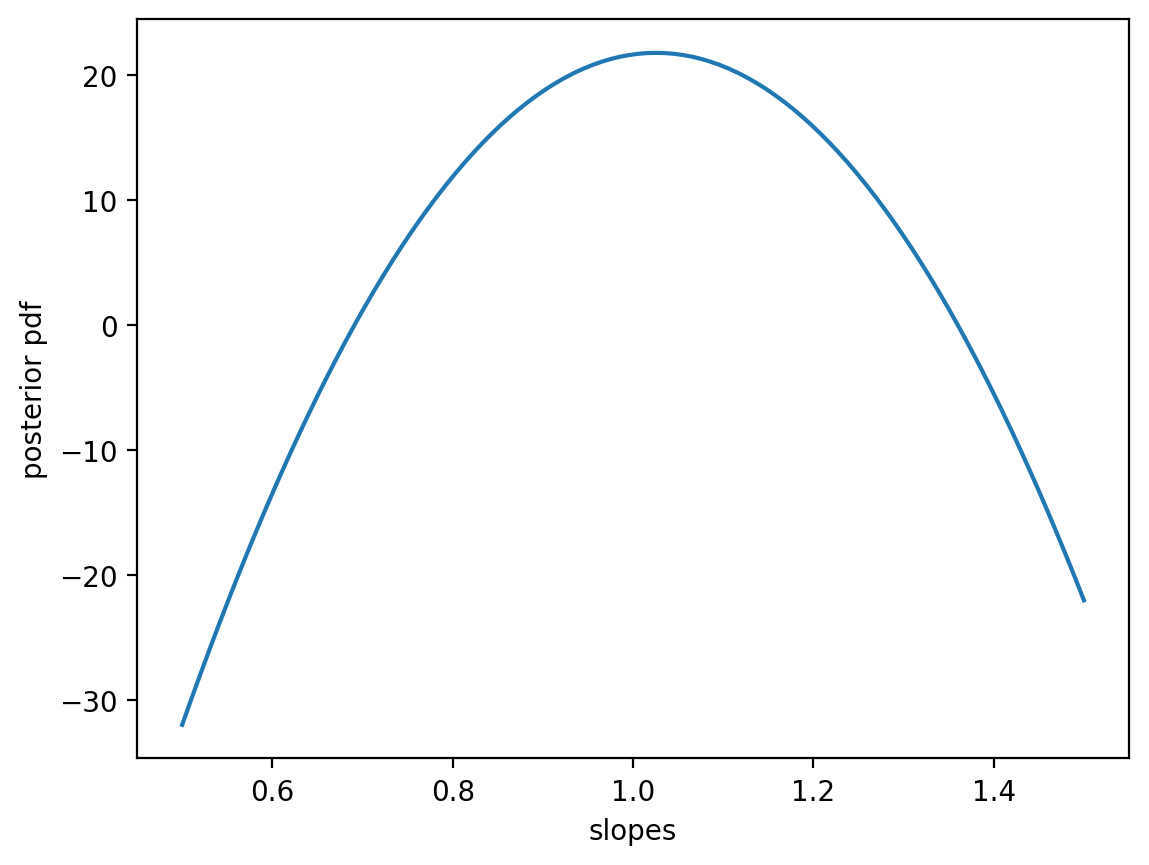

In [323]:
#plot 
plt.plot(slopes, lin_posterior)
plt.xlabel('slopes')
plt.ylabel('posterior pdf')
plt.show()

#### 2.3

In [325]:
#compute bayesian evidence
#from lecture 9 
x, y, sigma_y = data
chi_2_lin = np.sum(((y-polynomial_fit(slopes, x))/sigma_y)**2) 
print(chi_2_lin)

#lecture 9 uses chi^2 DOF
dof_lin = chi_2_lin/(x.size-1)
lin_evidence = (dof_lin-(0.5*dof_lin))
print(lin_evidence)

2983.201243568276
78.50529588337568


#### 2.4

 Give the linear coefficient a uniform prior between 0.5 and 1.5. Give the quadratic coefficient a uniform prior between -1 and 0.25. Plot this two-dimensional posterior. Remember this is a two-dimensional model because the $y$-intercept is fixed. I advise a grid size of 100 in each model dimension.

In [284]:
# From https://jakevdp.github.io/blog/2015/08/07/frequentism-and-bayesianism-5-model-selection/:
#"If the theta variable is length 3, this corresponds to the quadratic model"


def polynomial_fit(theta, x):
    """Polynomial model of degree (len(theta) - 1)"""
    # For a polynomial with order 1, this gives theta_0 + theta_1*x
    # For a polynomial with order 2, this gives theta_0 + theta_1*x + theta_2*x^2, etc.
    return sum(t * x ** n for (n, t) in enumerate(theta))

#define uniform prior in range 0.5 to 1.5 -- keep prior the same as 2.2
def u_prior(theta):
    u_prior_min = 0.5
    u_prior_max = 1.5
    unif_prior = scipy.stats.uniform.pdf(theta, loc=u_prior_min, scale=(u_prior_max-u_prior_min))
    return unif_prior

#uniform prior for quadratic coefficient
def u_quad_prior(theta):
    quad_min = -1.0
    quad_max = 0.25
    q_prior = scipy.stats.uniform.pdf(theta, loc=quad_min, scale=(quad_max-quad_min))
    return q_prior

# compute the data log-likelihood given a model
def logL(theta, data, model=polynomial_fit):
    """Gaussian log-likelihood of the model at theta"""
    x, y, sigma_y = data
    y_fit = model(theta, x)
    return sum(scipy.stats.norm.logpdf(*args) 
               for args in zip(y, y_fit, sigma_y))

#make a theta variable of length 3 for the quadratic model
y_intercept = -0.23
slopes = np.linspace(0.5, 1.5 , 100) #grid size of 100
linear_coefficients = np.linspace(-1.0, 0.25, 100)

#define the posterior pdf
quad_likelihood =  np.array([[logL([y_intercept, slope, linear], data) for slope in slopes] for linear in linear_coefficients])
quad_prior = np.array([u_quad_prior(linear) for linear in linear_coefficients])

quad_posterior = quad_likelihood * quad_prior

print(quad_posterior)
print(quad_posterior.shape) #we want a 100x100 array

[[-187.38041624 -183.80155649 -180.25446412 ...   11.86010154
    12.35752633   12.82318376]
 [-184.52589417 -180.97155177 -177.44897673 ...   12.33644113
    12.80934858   13.25048866]
 [-181.69212902 -178.16230397 -174.66424628 ...   12.7920238
    13.2404139    13.65703663]
 ...
 [  -7.13602125   -5.93534398   -4.76643409 ...  -38.57920416
   -40.45996185  -42.37248691]
 [  -6.29492097   -5.11876105   -3.9743685  ...  -40.11628636
   -42.0215614   -43.9586038 ]
 [  -5.47457762   -4.32293504   -3.20305983 ...  -41.67412549
   -43.60391787  -45.56547762]]
(100, 100)


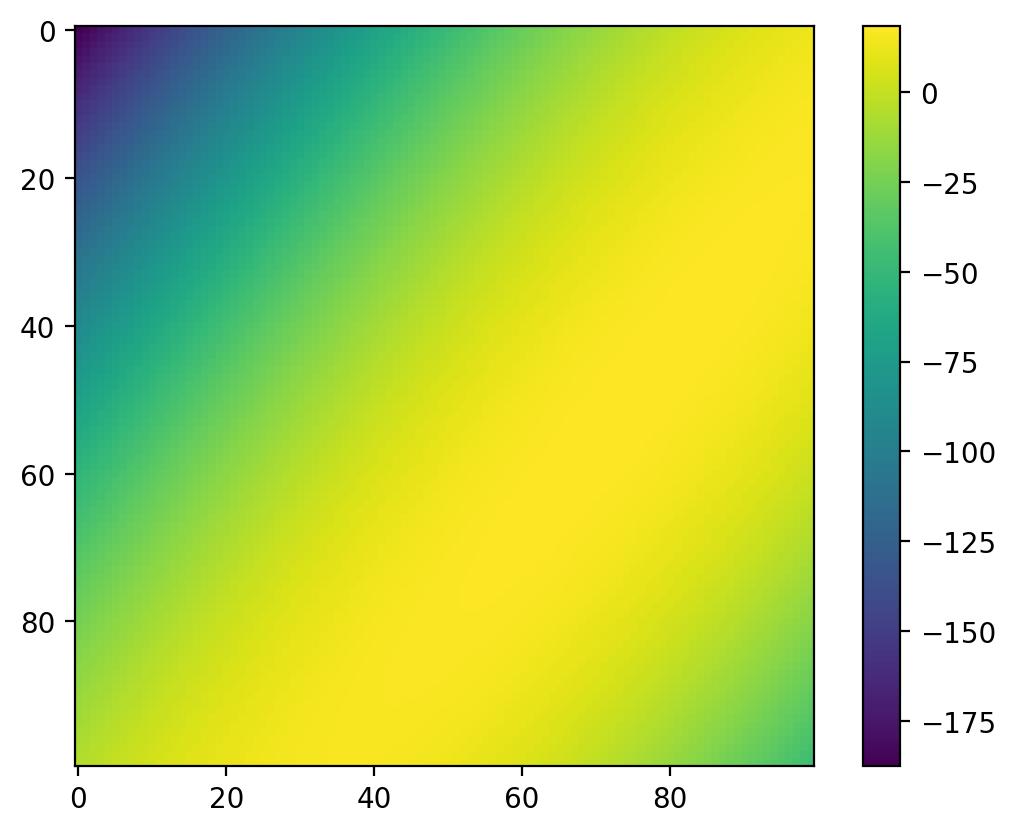

In [306]:
#plot 
plt.imshow(quad_posterior)
plt.colorbar()
plt.show()

#### 2.5

In [313]:
chi_2_quad = np.sum(((y-polynomial_fit(linear_coefficients, x))/sigma_y)**2) 
print(chi_2_quad)
dof_quad = chi_2_quad/(x.size-2)
quad_evidence = (dof_quad-(0.5*dof_quad))
print(quad_evidence)


14834.48057613191
412.06890489255306


##### 2.6

In [326]:
bayes_linear = 78.50529588337568/quad_evidence

bayes_quadratic = quad_evidence/78.50529588337568

print("Bayes factor for the linear model=", bayes_linear)
print("Bayes factor for the quadratic model=", bayes_quadratic)

Bayes factor for the linear model= 0.1905149720138333
Bayes factor for the quadratic model= 5.248931301459026


The BIC from lecture 9 was 17.31 for the linear model and 18.45 for the quadratic model, so this agrees that the quadratic model is likely a better fit.